In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size':20})

In [127]:
times_bench_all = np.array([np.array([19.1054,18.3984,18.0124,18.0027,18.0713,19.0496,17.438,18.5968,17.4574,18.0889]),
                     np.array([24.9404,21.8598,24.051,19.6723,20.4052,22.2249,22.4353,18.0864,18.4664,18.2007]),
                    np.array([18.6348,17.9051,19.866,17.7667,18.2322,18.3696,19.6266,19.0655,20.5637,19.9066]),
                     np.array([19.6923,20.5261,22.0764,21.1831,21.2053,18.41,19.614,20.2572,21.8718,17.8612]),
                     np.array([18.9147,18.6044,20.9093,20.3591,22.6243,20.1636,22.1596,24.1204,19.5583,20.73])])
times_bench = np.mean(times_bench_all, axis=1)
print(times_bench)

times_synthetic_all = np.array([np.array([1.11053,1.22638,1.47843,1.14709,0.991346,1.18075,1.04782,1.06351,1.0976,1.14948]),
                     np.array([2.04151,2.07913,2.02431,2.26089,2.51042,2.12897,2.06413,2.02824,2.00524,2.15542]),
                    np.array([3.7276,3.94378,3.97276,3.70957,3.75657,3.65373,4.11203,4.01867,3.82128,3.70797]),
                     np.array([9.44867,7.49469,7.49645,8.31179,7.59643,7.15031,7.57397,8.71781,7.27018,7.84888])])

communication_synthetic = np.array([3.50373,5.09093,8.26533,14.6141])
error = np.std(times_synthetic_all,axis=1)

times_synthetic =np.mean(times_synthetic_all, axis=1)
print(times_synthetic)
print('err',error)

communication_synthetic_128 = np.array([6.44352,9.69152,16.1875,29.6596])
times_synthetic_all_128 = np.array([np.array([2.28096,2.16304,2.53159,2.15302,2.35554,2.04776,2.22968,1.96573,1.85322,2.50308]),
                     np.array([3.38385,2.78226,3.14234,2.8062,3.1643,3.06749,2.57405,2.89504,3.1191,3.29834]),
                    np.array([8.96166,8.8414,9.2714,7.96325,8.09257,9.27828,7.54808,8.74814,8.99701,8.25281]),
                     np.array([17.0887,16.6458,17.4317,15.8515,16.1419,17.0124,17.9837,18.5369,16.4078,16.1143])])
times_synthetic_128 =np.mean(times_synthetic_all_128, axis=1)
error2 = np.std(times_synthetic_all_128,axis=1)
print('err',error2)

print(times_synthetic_128)
print(times_synthetic)


[18.22209 21.03424 18.99368 20.26974 20.81437]
[1.1492936 2.129826  3.842396  7.890918 ]
err [0.12729709 0.14640564 0.14944784 0.68722913]
err [0.20847716 0.23965269 0.56296379 0.82331372]
[ 2.208362  3.023297  8.59546  16.92147 ]
[1.1492936 2.129826  3.842396  7.890918 ]


In [ ]:
time_hepth_10 = np.array([16.3257,16.6714,15.6743,15.4767,16.8553,16.904,16.6947,16.0707,17.155,16.7496])
time_hepth_
communication_hepth = np.array([5.26141])


model   
0.004379 x + 0.4328
test


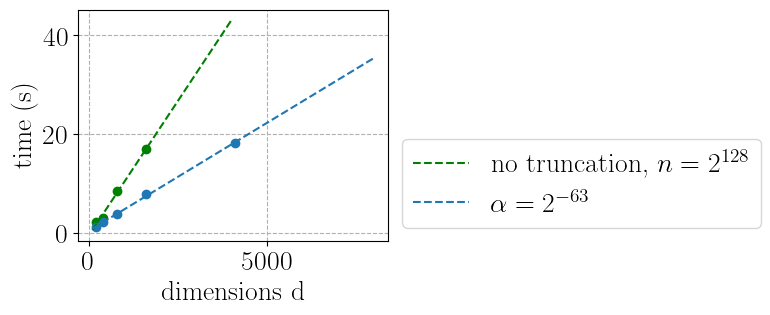

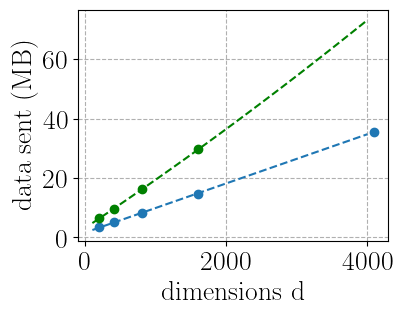

In [126]:


dataset_sizes = [200, 400, 800, 1600,4096]

# times = np.array([semi_100_other, semi_200_other, semi_300_other, semi_400_other, semi_500_other])
# data_sent = np.array([comm_100_other, comm_200_other, comm_300_other, comm_400_other,comm_500_other])

x = dataset_sizes
fig, ax = plt.subplots(1, figsize=(4,3))
ax.grid(ls="dashed")
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set(xlabel='dimensions d', ylabel=r'time (s)')

mymodel2 = np.poly1d(np.polyfit([200, 400, 800, 1600], times_synthetic_128, 1))
myline2 =np.linspace(100, 4000, 100)
ax.scatter([200, 400, 800, 1600], times_synthetic_128,c='g')
ax.plot(myline2, mymodel2(myline2),linestyle='dashed',c='g',label=r"no truncation, $n=2^{128}$")
# ax.errorbar([200, 400, 800, 1600], times_synthetic_128, yerr=error2, fmt="o",c='g')




y=[times_synthetic[0],times_synthetic[1],times_synthetic[2],times_synthetic[3],18.22209]#times/(60)

mymodel = np.poly1d(np.polyfit(x, y, 1))
print('model ',mymodel)
print('test')

myline =np.linspace(100, 8000, 100)


ax.scatter(x, y)
ax.plot(myline, mymodel(myline),linestyle='dashed', label=r"$\alpha=2^{-63}$")
# ax.errorbar(x, y, yerr=error, fmt="o",c='#1f77b4')



plt.legend(bbox_to_anchor=(1,0.5))


plt.savefig("vary_n_time.pdf", bbox_inches='tight')

plt.show()

y=[communication_synthetic[0],communication_synthetic[1],communication_synthetic[2],communication_synthetic[3],35.7024]#data_sent/1000

mymodel = np.poly1d(np.polyfit(x, y, 1))
# print('model ',mymodel)
# print('test')

myline =np.linspace(100, 4000, 100)



fig, ax = plt.subplots(1, figsize=(4,3))
#ax.set_xscale('log')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid(ls="dashed")
ax.set(xlabel='dimensions d', ylabel=r'data sent (MB)')
ax.scatter(x, y)
ax.plot(myline, mymodel(myline),linestyle='dashed')

y=communication_synthetic_128
mymodel = np.poly1d(np.polyfit([200, 400, 800, 1600], y, 2))
myline =np.linspace(100, 4000, 100)
ax.scatter([200, 400, 800, 1600], y,c='g')
ax.plot(myline, mymodel(myline),linestyle='dashed',c='g')


plt.savefig("vary_n_data.pdf", bbox_inches='tight')

plt.show()

[10, 64, 128]
model   
0.2304 x + 0.07912
test


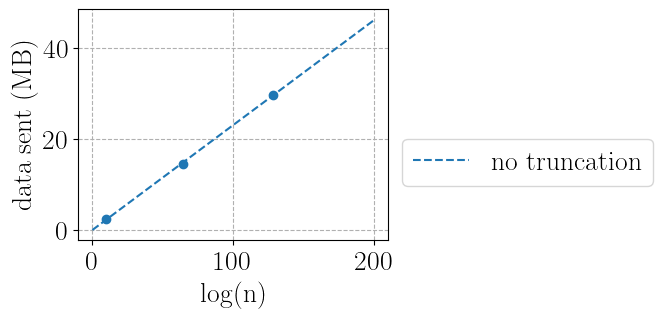

[10, 64, 128]
model   
0.08469 x + 4.947
test


/var/folders/1l/kf92_19x5hv3y_4npw32546jpgsdm1/T/ipykernel_49202/1423140759.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, '-o',linestyle='dashed',label='no truncation')


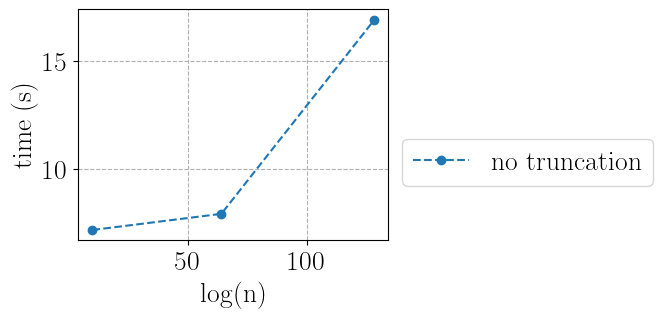

In [125]:
x = [10,64,128]
y=[2.49533,communication_synthetic[3],communication_synthetic_128[3]]#data_sent/1000
print(x)
mymodel = np.poly1d(np.polyfit(x, y, 1))
print('model ',mymodel)
print('test')

myline =np.linspace(0, 200, 100)



fig, ax = plt.subplots(1, figsize=(4,3))
#ax.set_xscale('log')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid(ls="dashed")
ax.set(xlabel='log(n)', ylabel=r'data sent (MB)')
ax.scatter(x, y)
line1=ax.plot(myline, mymodel(myline),linestyle='dashed',label='no truncation')

# x = [64,128]
# y=[0,communication_synthetic[3]]
# mymodel = np.poly1d(np.polyfit(x, y, 1))
# myline =np.linspace(64, 200, 100)
# ax.scatter(x, y,c='g')
# line2=ax.plot(myline, mymodel(myline),linestyle='dashed',c='g', label=r"$\alpha=2^{-63}$")

plt.legend(bbox_to_anchor=(1, 0.5))

# plt.savefig("vary_n_data.pdf", bbox_inches='tight')

plt.show()



x = [10,64,128]
y=[7.13749,times_synthetic[3],times_synthetic_128[3]]#data_sent/1000
print(x)
mymodel = np.poly1d(np.polyfit(x, y, 1))
print('model ',mymodel)
print('test')

myline =np.linspace(0, 200, 100)

fig, ax = plt.subplots(1, figsize=(4,3))
#ax.set_xscale('log')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid(ls="dashed")
ax.set(xlabel='log(n)', ylabel=r'time (s)')
ax.plot(x, y, '-o',linestyle='dashed',label='no truncation')
# line1=ax.plot(myline, mymodel(myline),linestyle='dashed',label='no truncation')

# x = [64,128]
# y=[0,times_synthetic[3]]
# mymodel = np.poly1d(np.polyfit(x, y, 1))
# myline =np.linspace(64, 200, 100)
# ax.scatter(x, y,c='g')
# line2=ax.plot(myline, mymodel(myline),linestyle='dashed',c='g', label=r"$\alpha=2^{-63}$")

plt.legend(bbox_to_anchor=(1, 0.5))

# plt.savefig("vary_n_data.pdf", bbox_inches='tight')

plt.show()